In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

In [3]:
train_df = pd.read_csv("/content/drive/Othercomputers/My Laptop/data-science-assignments/11 - Deep Learning/fashion-mnist_train.csv")


In [4]:
test_df = pd.read_csv("/content/drive/Othercomputers/My Laptop/data-science-assignments/11 - Deep Learning/fashion-mnist_test.csv")


In [5]:
X_train = train_df.drop(columns = 'label')
y_train = train_df['label']
X_test = test_df.drop(columns = 'label')
y_test = test_df['label']

In [6]:
X_train = X_train/255
X_test = X_test/255

In [7]:
X_train = X_train.values.reshape(X_train.shape[0],28,28,1)
X_test = X_test.values.reshape(X_test.shape[0],28,28,1)

In [8]:
X_train.shape

(60000, 28, 28, 1)

In [9]:
y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)

In [10]:
# Step 1: Define our network structure
# Save the input shape
input_shape = X_train.shape[1:4]
input_shape

(28, 28, 1)

In [11]:
# Sequential model
model = Sequential()

In [12]:
# Convolutional layer
model.add(Conv2D(filters = 8, # How many filters you wnat to use
                 kernel_size = 3, # size of each filter
                 input_shape = input_shape )) # What is the shape of your input features (we defined this above)
# Pooling layer
model.add(MaxPooling2D(pool_size = 2)) # Size of pooling
# Flattening layer
model.add(Flatten())
# Output layer
model.add(Dense(10, # How many output possibilities we have 
                activation = 'softmax')) # What activation function are you using?

In [13]:
# Step 2: Compile
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])

In [14]:
# Step 3: Fit our model
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=20)

Epoch 1/20
1875/1875 [==============================] - 21s 11ms/step - loss: 0.5429 - acc: 0.8071 - val_loss: 0.4123 - val_acc: 0.8615
Epoch 2/20
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3923 - acc: 0.8645 - val_loss: 0.3694 - val_acc: 0.8770
Epoch 3/20
1875/1875 [==============================] - 33s 18ms/step - loss: 0.3545 - acc: 0.8774 - val_loss: 0.3571 - val_acc: 0.8766
Epoch 4/20
1875/1875 [==============================] - 24s 13ms/step - loss: 0.3342 - acc: 0.8834 - val_loss: 0.3468 - val_acc: 0.8805
Epoch 5/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3161 - acc: 0.8903 - val_loss: 0.3198 - val_acc: 0.8903
Epoch 6/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3028 - acc: 0.8942 - val_loss: 0.3236 - val_acc: 0.8901
Epoch 7/20
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2932 - acc: 0.8971 - val_loss: 0.3171 - val_acc: 0.8897
Epoch 8/20
1875/1875 [==========================

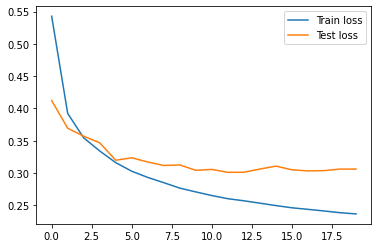

In [15]:
# Visualize the loss
plt.plot(history.history['loss'], label = 'Train loss')
plt.plot(history.history['val_loss'], label = 'Test loss')
plt.legend();

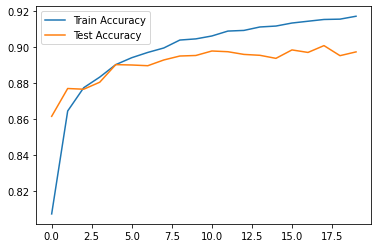

In [16]:
# Visualize the accuracy
plt.plot(history.history['acc'], label = 'Train Accuracy')
plt.plot(history.history['val_acc'], label = 'Test Accuracy')
plt.legend();